In [319]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [320]:
df_trials = pd.read_csv('Current_Active_Clinical_Trials_-_Roswell_Park_Cancer_Institute.csv')
df_trials.head(1)

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title
0,Brain and Nervous System,N-1262421,"Abad, A",01/07/2022,NaN,II,(A071702) A Phase II Study of Checkpoint Blockade Immunotherapy in Patients with Somatically Hypermutated Recurrent WHO Grade 4 Glioma


In [321]:
df_trials[df_trials['Principal_Investigator'] == 'Abad, A' ]

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title
0,Brain and Nervous System,N-1262421,"Abad, A",01/07/2022,NaN,II,(A071702) A Phase II Study of Checkpoint Blockade Immunotherapy in Patients with Somatically Hypermutated Recurrent WHO Grade 4 Glioma
1,Brain and Nervous System,I-546319,"Abad, A",07/08/2021,03/23/2022,NaN,Expanded Access to SurVaxM for Treatment of Patients with Glioblastoma Who Have No Access to Other Comparable or Alternative Therapy or Have Completed Treatment on a non-Randomized Clinical Trial of SurVaxM and May Benefit from Further Treatment
2,Brain and Nervous System,P-1281721,"Abad, A",03/08/2022,NaN,II,"A Multicenter, Open-Label Study with a Randomized Control Arm of the Efficacy, Safety, and Pharmacokinetics of Intravenously Infused Berubicin in Adult Patients with Recurrent Glioblastoma Multiforme (WHO Grade IV) After Failure of Standard First Line Therapy"
3,Brain and Nervous System,I-813720,"Abad, A",12/29/2021,NaN,II,Prospective Randomized Placebo-Controlled Trial of SurVaxM Plus Adjuvant Temozolomide for Newly Diagnosed Glioblastoma (SURVIVE)


In [322]:
df_trials['Principal_Investigator'] = df_trials['Principal_Investigator'].str.strip()
df_trials['Principal_Investigator'] = df_trials['Principal_Investigator'].str.lower()


In [323]:
df_trials['Principal_Investigator'].unique()

array(['abad, a', 'alarcon velasco, s', 'aly, a', 'ambrosone, c',
       'bain, a', 'bambach, b', 'barth, m', 'besharat shafiei, s',
       'bonaccio, e', 'bouchard, e', 'buxbaum, n', 'chatta, g', 'chen, g',
       'chen, h', 'chowdhry, v', 'cortese, m', 'dean, g', 'demmy, t',
       'dexter, e', 'dy, g', 'fabiano, a', 'fenstermaker, r',
       'fountzilas, c', 'frederick, p', 'fung-kee-fung, s', 'gandhi, s',
       'george, s', 'ghione, p', 'glaser, k', 'goniewicz, m',
       'gopalakrishnan, d', 'green, s', 'griffiths, e', 'grimmer, j',
       'gupta, a', 'guru, k', 'hahn, t', 'haring, r', 'hernandez, f',
       'herr, m', 'hicks, w', 'hillengass, j', 'hiscock, m', 'ho, c',
       'hong, c', 'hutson, a', 'hyland, a', 'ivanick, n', 'iyer, r',
       'jain, p', 'kane, j', 'kelly, k', 'keppel, a', 'kisailus, a',
       'krishnamurthy, a', 'kuettel, m', 'kukar, m', 'lau, j', 'lee, k',
       'lele, s', 'levine, e', 'lipinski, l', 'mahoney, m', 'malik, n',
       'mccarthy, p', 'mcspadden

In [324]:
df_trials.groupby('Principal_Investigator')['Primary_Site'].apply(lambda x: ', '.join(x.astype(str).unique())).reset_index()

,Principal_Investigator,Primary_Site
0,"abad, a",Brain and Nervous System
1,"alarcon velasco, s",Colon
2,"aly, a","Bladder, Prostate"
3,"ambrosone, c",Breast
4,"bain, a",Pancreas
...,...,...
106,"wooten, k","Lip, Oral Cavity and Pharynx, Melanoma, Skin"
107,"yau, e",Lung
108,"yeary, k","Bladder, nan"
109,"yendamuri, s","Multiple Sites, Lung, nan"


In [325]:
df_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Primary_Site            424 non-null    object
 1   Protocol                463 non-null    object
 2   Principal_Investigator  463 non-null    object
 3   Date_Opened             462 non-null    object
 4   Date_Closed             163 non-null    object
 5   Study_Phase             291 non-null    object
 6   Title                   463 non-null    object
dtypes: object(7)
memory usage: 25.4+ KB


In [326]:
df_trials['Date_Opened'] = pd.to_datetime(df_trials['Date_Opened'],format='%m/%d/%Y')

In [327]:
df_trials['Date_Closed'] = pd.to_datetime(df_trials['Date_Closed'],format='%m/%d/%Y')


In [328]:
df_trials

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title
0,Brain and Nervous System,N-1262421,"abad, a",2022-01-07,NaT,II,(A071702) A Phase II Study of Checkpoint Blockade Immunotherapy in Patients with Somatically Hypermutated Recurrent WHO Grade 4 Glioma
1,Brain and Nervous System,I-546319,"abad, a",2021-07-08,2022-03-23,NaN,Expanded Access to SurVaxM for Treatment of Patients with Glioblastoma Who Have No Access to Other Comparable or Alternative Therapy or Have Completed Treatment on a non-Randomized Clinical Trial of SurVaxM and May Benefit from Further Treatment
2,Brain and Nervous System,P-1281721,"abad, a",2022-03-08,NaT,II,"A Multicenter, Open-Label Study with a Randomized Control Arm of the Efficacy, Safety, and Pharmacokinetics of Intravenously Infused Berubicin in Adult Patients with Recurrent Glioblastoma Multiforme (WHO Grade IV) After Failure of Standard First Line Therapy"
3,Brain and Nervous System,I-813720,"abad, a",2021-12-29,NaT,II,Prospective Randomized Placebo-Controlled Trial of SurVaxM Plus Adjuvant Temozolomide for Newly Diagnosed Glioblastoma (SURVIVE)
4,Colon,N-626620,"alarcon velasco, s",2020-07-15,2023-02-27,II,(S1922) A Randomized Phase II Selection Study of Ramucirumab and Paclitaxel versus FOLFIRI in Refractory Small Bowel Adenocarcinoma
...,...,...,...,...,...,...,...
458,Multiple,P-1391721,"zsiros, e",2022-05-20,NaT,I/II,"NC762-01 A Phase 1/2, Open-Label, Dose-Escalation, Safety and Tolerability Study of NC762 in Subjects with Advanced or Metastatic Solid Tumors"
459,Multiple,P-2058021,"zsiros, e",2022-07-29,NaT,I,A Phase 1 Safety and Tolerability Study of DeTIL-0255 in Adults with Advanced Malignancies
460,Multiple,P-1263921,"zsiros, e",2022-02-18,2022-12-07,I,"A Phase 1, multicenter, Open-Label Study of SQZ-AAC-HPV as Monotherapy and in Combination with Immune Checkpoint Inhibitors in HLA-A*02+ Patients with HPV16+ Recurrent, Locally Advanced or Metastatic Solid Tumors"
461,Corpus Uteri; Ovary,I-37616,"zsiros, e",2016-12-12,NaT,NaN,Life On The Go 1: Evaluating the Effect of Baseline Physical Activity of Patients with Endometrial and Ovarian Cancer using State of the Art Activity Tracking Device


In [329]:
df_trials.columns

Index(['Primary_Site', 'Protocol', 'Principal_Investigator', 'Date_Opened',
       'Date_Closed', 'Study_Phase', 'Title'],
      dtype='object')

In [330]:
df_trials['Primary_Site'].nunique()

62

In [331]:
df_trials = df_trials.dropna(subset=['Date_Closed'])

In [332]:
df_trials = df_trials.dropna(subset=['Study_Phase'])

In [333]:
df_trials.isna().sum()

Primary_Site              5
Protocol                  0
Principal_Investigator    0
Date_Opened               0
Date_Closed               0
Study_Phase               0
Title                     0
dtype: int64

In [334]:
nan_rows_primary = df_trials[df_trials['Primary_Site'].isna()]


In [335]:
# DRop de la variable

df_trials = df_trials.drop(nan_rows_primary.index)

In [336]:
df_trials

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title
4,Colon,N-626620,"alarcon velasco, s",2020-07-15,2023-02-27,II,(S1922) A Randomized Phase II Selection Study of Ramucirumab and Paclitaxel versus FOLFIRI in Refractory Small Bowel Adenocarcinoma
10,Other Hematopoietic,N-71918,"bambach, b",2018-10-11,2022-04-15,III,"(ACCL1633) The Effectiveness of Lactobacillus plantarum (LBP, IND# 17339) in Preventing Acute Graft-versus-Host Disease (GvHD) in Children undergoing Alternative Hematopoietic Progenitor Cell Transplantation (HCT)"
11,"Multiple Sites; Leukemia, other",PH-271115,"bambach, b",2016-08-03,2021-06-10,III,"(ACCL1333/CV185-155) A Phase III Randomized, Open Label, Multi-center Study of the Safety and Efficacy of Apixaban for Venous Thromboembolism Prevention versus No Systemic Anticoagulant Prophylaxis during Induction Chemotherapy in Children with Newly Diagnosed Acute Lymphoblastic Leukemia (ALL) or Lymphoblastic Lymphoma (T or B cell) Treated with Asparaginase"
30,Multiple Sites; Bladder,I-69518,"chatta, g",2019-04-10,2022-12-01,II,(CITN-14) Randomized Phase II study of Atezolizumab (MPDL3280A) plus Recombinant Human IL-7 (CYT107) in patients with locally advanced or metastatic urothelial carcinoma
31,Prostate,I-63418,"chatta, g",2019-06-07,2022-07-20,I/II,Phase Ib/II Study of Enzalutamide with Venetoclax (ABT-199) in Patients with Metastatic Castrate Resistant Prostate Cancer (mCRPC)
...,...,...,...,...,...,...,...
432,Myeloid and Monocytic Leukemia,P-1187721,"wang, e",2022-05-25,2022-10-25,II,A Phase 2 Multi-Arm Study of Magrolimab Combinations in Patients with Myeloid Malignancies
434,Myeloid and Monocytic Leukemia,P-57117,"wang, e",2018-07-11,2022-09-19,I,"A Phase 1/2, Multi-center, Open-label Study of IMGN632 Monotherapy Administered Intravenously in Patients with CD123-positive Acute Myeloid Leukemia and Other CD123- positive Hematologic Malignancies"
438,"Myeloid and Monocytic Leukemia; Leukemia, other",P-46617,"wang, e",2018-01-10,2022-06-30,I/II,Tagraxofusp (SL-401) in Patients with Chronic Myelomonocytic Leukemia (CMML) or Myelofibrosis (MF)
455,Multiple,P-762420,"zsiros, e",2022-03-17,2022-08-19,I,"20190131 A Phase 1, Multicenter, Open-label,Dose-Exploration and Dose-Expansion Study Evaluating the Safety,Tolerability,Pharmacokinetics, and Efficacy of AMG 650 in Subjects With Advanced Solid Tumors"


In [337]:
df_trials['Protocol'].nunique()

105

In [338]:
df_trials['Study_Phase'].unique()

array(['II', 'III', 'I/II', 'I', 'IV', 'II/III', 'Early Phase I'],
      dtype=object)

In [339]:
df_trials['Study_Phase_numeric'] = df_trials['Study_Phase'].replace({'Early Phase I':-1,'I': 1,'I/II':1-2, 'II': 2,'II/III': 2-3, 'III': 3,'IV':4 })

In [340]:
pd.set_option('display.max_colwidth', None)

In [341]:
df_trials['Code_title'] = df_trials['Title'].str.extract(r'\((.*?)\)')

In [342]:
df_trials.head(1)

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title,Study_Phase_numeric,Code_title
4,Colon,N-626620,"alarcon velasco, s",2020-07-15,2023-02-27,II,(S1922) A Randomized Phase II Selection Study of Ramucirumab and Paclitaxel versus FOLFIRI in Refractory Small Bowel Adenocarcinoma,2,S1922


In [343]:
df_trials.shape

(105, 9)

In [344]:
print('Trial unique - ',df_trials['Code_title'].unique())
print()
print('Clinical trials = '  ,df_trials['Code_title'].nunique())

Trial unique -  ['S1922' 'ACCL1633' 'ACCL1333/CV185-155' 'CITN-14' 'ABT-199' 'BPX-601' nan
 'ALVR105' 'E4512 ' 'osimertinib' 'CodeBreak 100' 'NSCLC' 'TABAsCO'
 'ISN 8951-CL-0301' 'BPX-603' 'HCRN ESO17-325' 'MK-3475' 'ALKS 4230-001'
 'HM30181A + Eribulin' 'SC' 'ASG-22CE' 'EBV+' 'A031901' 'ASTX727 LD'
 'A091902' 'ABT 199' 'A041702' 'MLN4924, TAK924' 'DLBCL' 'CTLA4-Ig'
 'CAR-T' 'AMG 510' 'S1826' 'Pembrolizumab' 'ADT' 'Phase II' 'NRG-GY006'
 'A011202' 'NCT03199885' 'NSC #707389' 'CAR' 'AML' 'A021502' 'NCI 9673'
 'TAS-102' 'GEC' 'S1827' 'S2000' 'PET-Stop' 'S1609' 'S1801' 'ADCT-301'
 'tavo, pIL-12' 'GA-CARES' 'COG ALTE1621' 'BMT CTN Protocol 1507'
 'Multi Tumor-Associated Antigen T cells' 'NRG-HN004' 'PAI' 'SBRT' 'S1712'
 'AU2' 'VICC HEM1755' 'COG AAML1531' 'COG AALL1521' 'Obi-3424' 'SL-401']

Clinical trials =  66


In [345]:
df_trials['Code_title'].value_counts().idxmax()

'S1922'

In [346]:
unique_trials = df_trials['Code_title'].value_counts().sort_values(ascending=False)

In [347]:
print(unique_trials)

Code_title
S1922                 1
MK-3475               1
S1826                 1
ACCL1333/CV185-155    1
CITN-14               1
                     ..
AU2                   1
VICC HEM1755          1
COG AAML1531          1
COG AALL1521          1
SL-401                1
Name: count, Length: 66, dtype: int64


In [348]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)


In [349]:
df_trials['Study_Duration'] = df_trials['Date_Closed'] - df_trials['Date_Opened']

In [350]:
df_trials.head()

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title,Study_Phase_numeric,Code_title,Study_Duration
4,Colon,N-626620,"alarcon velasco, s",2020-07-15,2023-02-27,II,(S1922) A Randomized Phase II Selection Study of Ramucirumab and Paclitaxel versus FOLFIRI in Refractory Small Bowel Adenocarcinoma,2,S1922,957 days
10,Other Hematopoietic,N-71918,"bambach, b",2018-10-11,2022-04-15,III,"(ACCL1633) The Effectiveness of Lactobacillus plantarum (LBP, IND# 17339) in Preventing Acute Graft-versus-Host Disease (GvHD) in Children undergoing Alternative Hematopoietic Progenitor Cell Transplantation (HCT)",3,ACCL1633,1282 days
11,"Multiple Sites; Leukemia, other",PH-271115,"bambach, b",2016-08-03,2021-06-10,III,"(ACCL1333/CV185-155) A Phase III Randomized, Open Label, Multi-center Study of the Safety and Efficacy of Apixaban for Venous Thromboembolism Prevention versus No Systemic Anticoagulant Prophylaxis during Induction Chemotherapy in Children with Newly Diagnosed Acute Lymphoblastic Leukemia (ALL) or Lymphoblastic Lymphoma (T or B cell) Treated with Asparaginase",3,ACCL1333/CV185-155,1772 days
30,Multiple Sites; Bladder,I-69518,"chatta, g",2019-04-10,2022-12-01,II,(CITN-14) Randomized Phase II study of Atezolizumab (MPDL3280A) plus Recombinant Human IL-7 (CYT107) in patients with locally advanced or metastatic urothelial carcinoma,2,CITN-14,1331 days
31,Prostate,I-63418,"chatta, g",2019-06-07,2022-07-20,I/II,Phase Ib/II Study of Enzalutamide with Venetoclax (ABT-199) in Patients with Metastatic Castrate Resistant Prostate Cancer (mCRPC),-1,ABT-199,1139 days


In [351]:
df_trials['Primary_Site'].nunique()

39

In [352]:
df_trials.to_csv('Trials.csv', index=False)

In [353]:
df_trials.head()

,Primary_Site,Protocol,Principal_Investigator,Date_Opened,Date_Closed,Study_Phase,Title,Study_Phase_numeric,Code_title,Study_Duration
4,Colon,N-626620,"alarcon velasco, s",2020-07-15,2023-02-27,II,(S1922) A Randomized Phase II Selection Study of Ramucirumab and Paclitaxel versus FOLFIRI in Refractory Small Bowel Adenocarcinoma,2,S1922,957 days
10,Other Hematopoietic,N-71918,"bambach, b",2018-10-11,2022-04-15,III,"(ACCL1633) The Effectiveness of Lactobacillus plantarum (LBP, IND# 17339) in Preventing Acute Graft-versus-Host Disease (GvHD) in Children undergoing Alternative Hematopoietic Progenitor Cell Transplantation (HCT)",3,ACCL1633,1282 days
11,"Multiple Sites; Leukemia, other",PH-271115,"bambach, b",2016-08-03,2021-06-10,III,"(ACCL1333/CV185-155) A Phase III Randomized, Open Label, Multi-center Study of the Safety and Efficacy of Apixaban for Venous Thromboembolism Prevention versus No Systemic Anticoagulant Prophylaxis during Induction Chemotherapy in Children with Newly Diagnosed Acute Lymphoblastic Leukemia (ALL) or Lymphoblastic Lymphoma (T or B cell) Treated with Asparaginase",3,ACCL1333/CV185-155,1772 days
30,Multiple Sites; Bladder,I-69518,"chatta, g",2019-04-10,2022-12-01,II,(CITN-14) Randomized Phase II study of Atezolizumab (MPDL3280A) plus Recombinant Human IL-7 (CYT107) in patients with locally advanced or metastatic urothelial carcinoma,2,CITN-14,1331 days
31,Prostate,I-63418,"chatta, g",2019-06-07,2022-07-20,I/II,Phase Ib/II Study of Enzalutamide with Venetoclax (ABT-199) in Patients with Metastatic Castrate Resistant Prostate Cancer (mCRPC),-1,ABT-199,1139 days


In [357]:
df_trials['Date_Opened'].min()

Timestamp('2014-04-08 00:00:00')

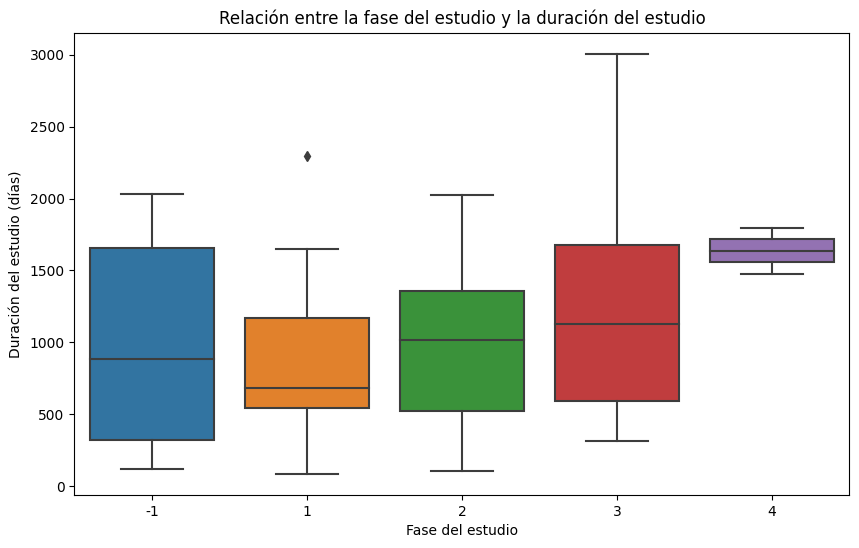

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_trials['Study_Duration'] = pd.to_timedelta(df_trials['Study_Duration'])

df_trials['Study_Duration_days'] = df_trials['Study_Duration'].dt.days

plt.figure(figsize=(10, 6))
sns.boxplot(x='Study_Phase_numeric', y='Study_Duration_days', data=df_trials)
plt.title('Relación entre la fase del estudio y la duración del estudio')
plt.xlabel('Fase del estudio')
plt.ylabel('Duración del estudio (días)')
plt.show()

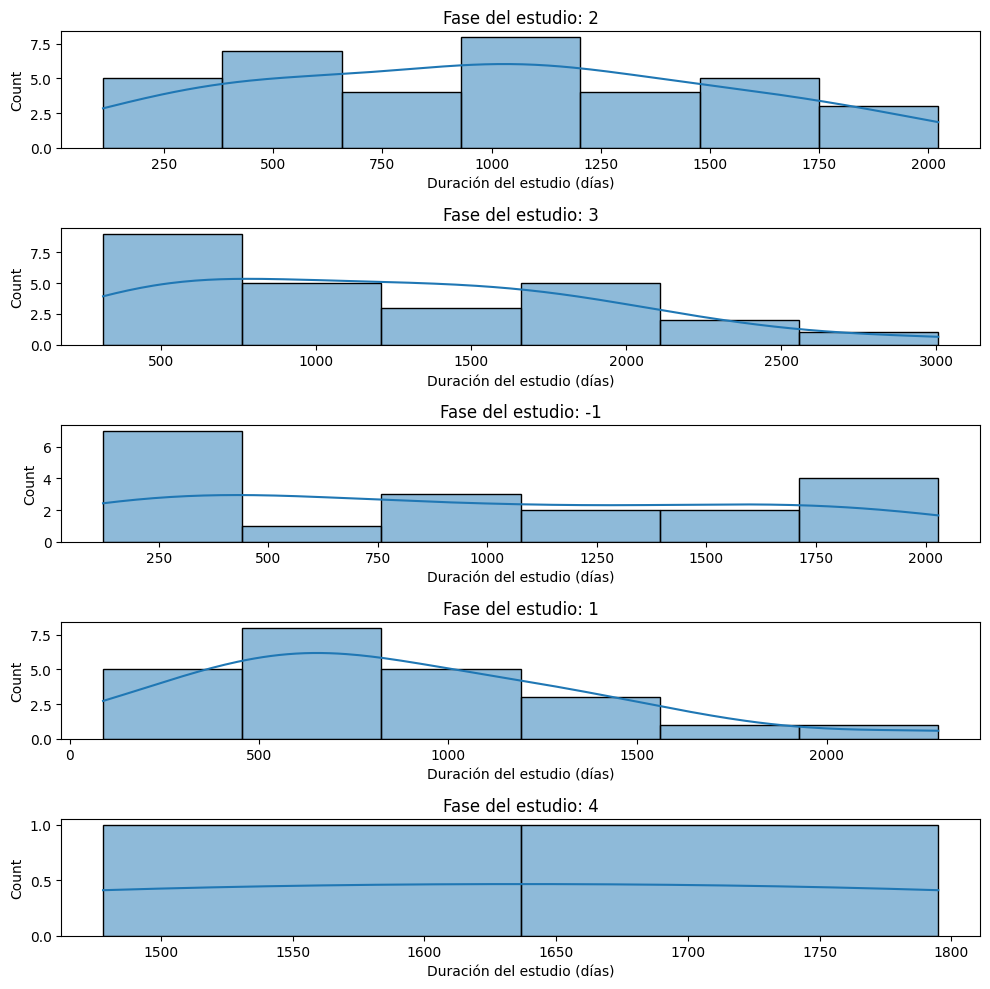

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que 'Study_Duration' sea de tipo 'timedelta'
df_trials['Study_Duration'] = pd.to_timedelta(df_trials['Study_Duration'])

# Convierte 'Study_Duration' a días
df_trials['Study_Duration_days'] = df_trials['Study_Duration'].dt.days

# Crea una figura y un conjunto de subtramas con un tamaño más grande en el eje y
fig, axs = plt.subplots(nrows=df_trials['Study_Phase_numeric'].nunique(), figsize=(10, 10))

# Para cada fase del estudio, crea un histograma o un gráfico KDE
for i, phase in enumerate(df_trials['Study_Phase_numeric'].unique()):
    sns.histplot(data=df_trials[df_trials['Study_Phase_numeric'] == phase], x='Study_Duration_days', kde=True, ax=axs[i])
    axs[i].set_title(f'Fase del estudio: {phase}')
    axs[i].set_xlabel('Duración del estudio (días)')

plt.tight_layout()
plt.show()
